In [1]:
# Step 1: Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN


In [2]:
data = pd.read_csv('fan_dataset.csv')

In [3]:
data.shape

(2000, 17)

In [4]:
data.head()

,Timestamp,Temperature (°C),Pressure (bar),Vibration_X,Vibration_Y,Vibration_Z,Humidity (%),RPM,Sound (dB),Current (A),Equipment Type,Location,Overheating,Misalignment,Bearing Failure,Imbalance,Electrical Issue
0,2023-01-01 00:00:00,64.97,1.30,0.327,0.277,0.493,4.61,64.08,58.57,4.99,Axial,Plant A,0,1,0,0,0
1,2023-01-01 01:00:00,58.62,1.46,0.494,0.374,0.399,3.52,78.02,66.14,2.52,Exhaust,Plant A,0,0,0,0,0
2,2023-01-01 02:00:00,66.48,1.26,0.504,0.312,0.466,3.36,75.35,64.59,6.92,Exhaust,Plant A,0,0,0,0,0
3,2023-01-01 03:00:00,75.23,1.41,0.595,0.390,0.643,3.47,69.98,64.70,5.29,Axial,Plant A,0,0,0,0,0
4,2023-01-01 04:00:00,57.66,0.93,0.227,0.457,0.756,5.91,70.92,71.00,4.15,Exhaust,Plant C,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         2000 non-null   object 
 1   Temperature (°C)  2000 non-null   float64
 2   Pressure (bar)    2000 non-null   float64
 3   Vibration_X       2000 non-null   float64
 4   Vibration_Y       2000 non-null   float64
 5   Vibration_Z       2000 non-null   float64
 6   Humidity (%)      2000 non-null   float64
 7   RPM               2000 non-null   float64
 8   Sound (dB)        2000 non-null   float64
 9   Current (A)       2000 non-null   float64
 10  Equipment Type    2000 non-null   object 
 11  Location          2000 non-null   object 
 12  Overheating       2000 non-null   int64  
 13  Misalignment      2000 non-null   int64  
 14  Bearing Failure   2000 non-null   int64  
 15  Imbalance         2000 non-null   int64  
 16  Electrical Issue  2000 non-null   int64  


In [6]:
data.describe()

,Temperature (°C),Pressure (bar),Vibration_X,Vibration_Y,Vibration_Z,Humidity (%),RPM,Sound (dB),Current (A),Overheating,Misalignment,Bearing Failure,Imbalance,Electrical Issue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,60.450850,1.498125,0.490403,0.499101,0.500629,5.490660,70.118295,68.081705,5.034160,0.047500,0.080500,0.070500,0.050000,0.034500
std,9.884707,0.301726,0.199938,0.206683,0.197704,1.464415,4.995318,5.109625,1.001113,0.212759,0.272134,0.256052,0.217999,0.182555
min,27.590000,0.590000,-0.135000,-0.238000,-0.284000,3.010000,54.590000,49.820000,2.070000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.770000,1.290000,0.363000,0.355000,0.372000,4.190000,66.820000,64.670000,4.347500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.450000,1.500000,0.494000,0.494000,0.503000,5.450000,70.115000,68.090000,5.030000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.830000,1.700000,0.626000,0.642250,0.632250,6.810000,73.410000,71.580000,5.712500,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.530000,2.680000,1.123000,1.206000,1.175000,7.990000,87.140000,84.430000,9.480000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
for i in ['Equipment Type' , 'Location'] :
    print(data[i].value_counts() , "\n")
    

Equipment Type
Axial          693
Exhaust        675
Centrifugal    632
Name: count, dtype: int64 

Location
Plant C    685
Plant B    663
Plant A    652
Name: count, dtype: int64 



In [8]:
data.drop(columns=['Timestamp'], inplace=True)
data.head()

,Temperature (°C),Pressure (bar),Vibration_X,Vibration_Y,Vibration_Z,Humidity (%),RPM,Sound (dB),Current (A),Equipment Type,Location,Overheating,Misalignment,Bearing Failure,Imbalance,Electrical Issue
0,64.97,1.30,0.327,0.277,0.493,4.61,64.08,58.57,4.99,Axial,Plant A,0,1,0,0,0
1,58.62,1.46,0.494,0.374,0.399,3.52,78.02,66.14,2.52,Exhaust,Plant A,0,0,0,0,0
2,66.48,1.26,0.504,0.312,0.466,3.36,75.35,64.59,6.92,Exhaust,Plant A,0,0,0,0,0
3,75.23,1.41,0.595,0.390,0.643,3.47,69.98,64.70,5.29,Axial,Plant A,0,0,0,0,0
4,57.66,0.93,0.227,0.457,0.756,5.91,70.92,71.00,4.15,Exhaust,Plant C,0,0,0,0,0


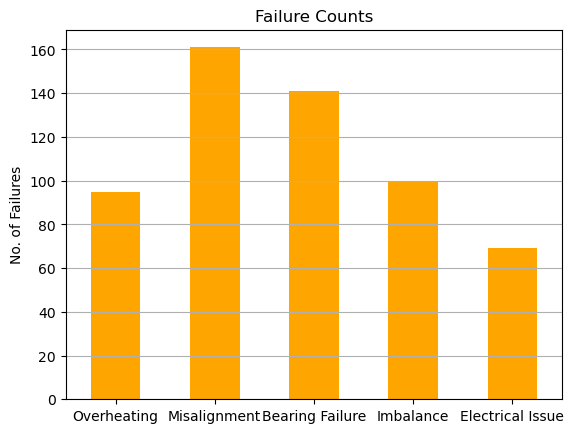

In [9]:
failure_cols = ['Overheating', 'Misalignment', 'Bearing Failure', 'Imbalance', 'Electrical Issue']

# Plot failure counts
data[failure_cols].sum().plot(kind='bar', title='Failure Counts', color='orange')
plt.ylabel('No. of Failures')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [10]:
target_cols = ['Overheating', 'Misalignment', 'Bearing Failure', 'Imbalance', 'Electrical Issue']

counts = data[target_cols].sum(axis=1).value_counts()
print(counts)


0    1485
1     467
2      45
3       3
Name: count, dtype: int64


In [11]:
# Create vibration magnitude
data['vibration_total'] = np.sqrt(data['Vibration_X']**2 + data['Vibration_Y']**2 + data['Vibration_Z']**2)

In [12]:
print(data.shape)
print(data.columns)
data.head()

(2000, 17)
Index(['Temperature (°C)', 'Pressure (bar)', 'Vibration_X', 'Vibration_Y',
       'Vibration_Z', 'Humidity (%)', 'RPM', 'Sound (dB)', 'Current (A)',
       'Equipment Type', 'Location', 'Overheating', 'Misalignment',
       'Bearing Failure', 'Imbalance', 'Electrical Issue', 'vibration_total'],
      dtype='object')


,Temperature (°C),Pressure (bar),Vibration_X,Vibration_Y,Vibration_Z,Humidity (%),RPM,Sound (dB),Current (A),Equipment Type,Location,Overheating,Misalignment,Bearing Failure,Imbalance,Electrical Issue,vibration_total
0,64.97,1.30,0.327,0.277,0.493,4.61,64.08,58.57,4.99,Axial,Plant A,0,1,0,0,0,0.653228
1,58.62,1.46,0.494,0.374,0.399,3.52,78.02,66.14,2.52,Exhaust,Plant A,0,0,0,0,0,0.736962
2,66.48,1.26,0.504,0.312,0.466,3.36,75.35,64.59,6.92,Exhaust,Plant A,0,0,0,0,0,0.754000
3,75.23,1.41,0.595,0.390,0.643,3.47,69.98,64.70,5.29,Axial,Plant A,0,0,0,0,0,0.958944
4,57.66,0.93,0.227,0.457,0.756,5.91,70.92,71.00,4.15,Exhaust,Plant C,0,0,0,0,0,0.912093


In [13]:
# Define target columns
target_cols = ['Overheating', 'Misalignment', 'Bearing Failure', 'Imbalance', 'Electrical Issue']

# Define input features (exclude timestamp & targets)
feature_cols = [
    col for col in data.columns 
    if col not in target_cols
]

X = data[feature_cols]
y = data[target_cols]


In [14]:
print(f"Number of features: {X.shape[1]}")
print(f"Feature columns: {X.columns}")
print(f"Number of target columns: {y.shape[1]}")
print(f"Target columns: {y.columns}")

Number of features: 12
Feature columns: Index(['Temperature (°C)', 'Pressure (bar)', 'Vibration_X', 'Vibration_Y',
       'Vibration_Z', 'Humidity (%)', 'RPM', 'Sound (dB)', 'Current (A)',
       'Equipment Type', 'Location', 'vibration_total'],
      dtype='object')
Number of target columns: 5
Target columns: Index(['Overheating', 'Misalignment', 'Bearing Failure', 'Imbalance',
       'Electrical Issue'],
      dtype='object')


In [15]:
split_index = int(0.8 * len(data))

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [16]:
X_train.shape, y_train.shape

((1600, 12), (1600, 5))

In [17]:
categorical_cols = ['Equipment Type', 'Location']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Build preprocessor: OneHot + Scaling
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [18]:
len(numerical_cols)

10

In [19]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import pandas as pd

def apply_smote_enn_multi_label(X, y):
    """
    Applies SMOTE followed by ENN independently for each label column.
    Returns (X_resampled, y_resampled) aligned row‑wise.
    """
    # Ensure integer index
    X = pd.DataFrame(X).reset_index(drop=True)
    y = pd.DataFrame(y).reset_index(drop=True)

    X_res_final = None
    y_res_final = pd.DataFrame()

    for i, label in enumerate(y.columns):
        print(f"\n🧩 Applying SMOTEENN for label: {label}")

        y_label = y[label]

        # Build SMOTEENN sampler: SMOTE(k_neighbors=5) + ENN(n_neighbors=3)
        smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
        enn   = EditedNearestNeighbours(n_neighbors=3)
        sampler = SMOTEENN(smote=smote, enn=enn)

        try:
            X_r, y_r = sampler.fit_resample(X, y_label)
            print(f"✅ {label}: 1s before = {sum(y_label==1)}, after = {sum(y_r==1)}")

            # Store the rebalanced feature matrix once
            if i == 0:
                X_res_final = pd.DataFrame(X_r, columns=X.columns)

            # Collect this label’s resampled vector
            y_res_final[label] = y_r

        except Exception as e:
            # If SMOTEENN fails, just carry forward the original column
            print(f"⚠️ Skipping {label} — error: {e}")
            y_res_final[label] = y_label

    # Reset index to keep everything aligned
    return X_res_final.reset_index(drop=True), y_res_final.reset_index(drop=True)


In [20]:
X_train.shape

(1600, 12)

In [21]:
X_encoded = preprocessor.fit_transform(X_train)
num_feats = numerical_cols
cat_feats = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feats = list(num_feats) + list(cat_feats)
X_encoded_df = pd.DataFrame(X_encoded, columns=all_feats)

# 2. Apply SMOTE+ENN per label
X_resampled, y_resampled = apply_smote_enn_multi_label(X_encoded_df, y_train)

# 3. Fit your multi‑output classifier
# classifier.fit(X_resampled, y_resampled)



🧩 Applying SMOTEENN for label: Overheating
✅ Overheating: 1s before = 71, after = 1519

🧩 Applying SMOTEENN for label: Misalignment
✅ Misalignment: 1s before = 131, after = 1465

🧩 Applying SMOTEENN for label: Bearing Failure
✅ Bearing Failure: 1s before = 114, after = 1478

🧩 Applying SMOTEENN for label: Imbalance
✅ Imbalance: 1s before = 84, after = 1511

🧩 Applying SMOTEENN for label: Electrical Issue
✅ Electrical Issue: 1s before = 55, after = 1540


In [22]:
print(X_resampled.shape)
print(y_resampled.shape)
print(y_resampled.isna().sum())  # should all be zero now


(3048, 14)
(3048, 5)
Overheating           0
Misalignment        114
Bearing Failure      84
Imbalance            21
Electrical Issue      0
dtype: int64


In [47]:
X_resampled.head()

,Temperature (°C),Pressure (bar),Vibration_X,Vibration_Y,Vibration_Z,Humidity (%),RPM,Sound (dB),Current (A),vibration_total,Equipment Type_Centrifugal,Equipment Type_Exhaust,Location_Plant B,Location_Plant C
0,0.460290,-0.663368,-0.837061,-1.058215,-0.045569,-0.587716,-1.199770,-1.880338,-0.036107,-1.300245,0.0,0.0,0.0,0.0
1,-0.178985,-0.135626,0.010233,-0.589256,-0.517415,-1.331120,1.592667,-0.388676,-2.514343,-0.871704,0.0,1.0,0.0,0.0
2,0.612307,-0.795304,0.060969,-0.889003,-0.181099,-1.440244,1.057817,-0.694102,1.900328,-0.784505,0.0,1.0,0.0,0.0
3,1.493199,-0.300545,0.522668,-0.511902,0.707377,-1.365221,-0.017892,-0.672426,0.264893,0.264377,0.0,0.0,0.0,0.0
4,-0.275632,-1.883773,-1.344422,-0.187982,1.274597,0.298913,0.170407,0.568983,-0.878908,0.024598,0.0,1.0,0.0,1.0


In [23]:
classifier = MultiOutputClassifier(RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    max_depth=5,
    n_estimators=20,
    n_jobs=-1
))

classifier.fit(X_resampled, y_resampled)

ValueError: Input y contains NaN.

In [53]:
y_resampled.isna().sum()

Overheating          49
Misalignment        148
Bearing Failure     112
Imbalance            73
Electrical Issue      0
dtype: int64

In [161]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Temperature (°C)',
                                                   'Pressure (bar)',
                                                   'Vibration_X', 'Vibration_Y',
                                                   'Vibration_Z',
                                                   'Humidity (%)', 'RPM',
                                                   'Sound (dB)', 'Current (A)',
                                                   'vibration_total']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Equipment Type',
                                                   'Location'])])),
                ('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=5,
                                                                        n_estimators=20,
                                                                        n_jobs=-1,
                                                                        random_state=42)))])

In [162]:
y_pred_train = pipeline.predict(X_train)
for i, label in enumerate(target_cols):
    print(f"\n=== {label} ===")
    print(classification_report(y_train[label], y_pred_train[:, i], zero_division=0))


=== Overheating ===
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1529
           1       0.31      0.80      0.45        71

    accuracy                           0.91      1600
   macro avg       0.65      0.86      0.70      1600
weighted avg       0.96      0.91      0.93      1600


=== Misalignment ===
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1469
           1       0.48      0.69      0.57       131

    accuracy                           0.91      1600
   macro avg       0.72      0.81      0.76      1600
weighted avg       0.93      0.91      0.92      1600


=== Bearing Failure ===
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1486
           1       0.32      0.71      0.44       114

    accuracy                           0.87      1600
   macro avg       0.65      0.80      0.69      1600
weight

In [163]:
y_pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report

for i, label in enumerate(target_cols):
    print(f"\n=== {label} ===")
    print(classification_report(y_test[label], y_pred[:, i], zero_division=0))




=== Overheating ===
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       376
           1       0.04      0.04      0.04        24

    accuracy                           0.88       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.88      0.88      0.88       400


=== Misalignment ===
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       370
           1       0.00      0.00      0.00        30

    accuracy                           0.87       400
   macro avg       0.46      0.47      0.47       400
weighted avg       0.85      0.87      0.86       400


=== Bearing Failure ===
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       373
           1       0.06      0.11      0.07        27

    accuracy                           0.81       400
   macro avg       0.49      0.49      0.48       400
weight